 Project/homework

**Titanic data set** is a multimodal tabular data suitable for binary classification.

Goals:
- review data: note some conclusions
- build a model: survival prediction is your outcome
- validate model: check for overfitting
- check feature importance:
  - which feature doesn't improve results
  - which features are the most important one

**Please send colab link to kwant@agh.edu.pl before 03.04.2024 (pro 05.04.2024)**.

## https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html
0. Survived Indicator
1. Passenger Class
2. Name
3. Sex
4. Age
5. Siblings Aboard
6. Parents Aboard
7. Fare paid in £s


- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

In [1]:
import platform
import pandas as pd
import numpy as np
v = platform.python_version_tuple();
if float(v[1]) < 10:
    raise Exception("MUST USE Python 3.10 to use MATCH expression!")

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
import sys;
np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_colwidth = 1000

from enum import Enum, unique

@unique
class PDataType(Enum):
    NUMERICAL = 1
    CATHEGORICAL = 2

def remove_distinct_value_features(df):
    return [e for e in df.columns if df[e].nunique() == 1]

def get_data_type(df, type):
    match type:
        case PDataType.NUMERICAL:
            return df.select_dtypes(np.number);
        case PDataType.CATHEGORICAL:
            return df.select_dtypes(include='object');

#select all cathegorigal data where the first value is more than percent%?
def get_cathegorical_data_by_percent(df, percent):
    col_names = get_data_type(df,PDataType.CATHEGORICAL)
    to_return = []
    for col_name in col_names:
        unique_v_df = (df[col_name].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        if unique_v_df.iloc[0].percent > percent:
            to_return.append(col_name);
    return to_return
    
def fill_empty_data_with(df, type, filler):
    col_names = get_data_type(df,type)
    for c in col_names:
        test_data_csv[c] = test_data_csv[c].fillna(filler)


In [2]:
DO_NOT_PLOT = False

In [3]:
#define Seaborn color palette to use
import numpy as np
from math import ceil
from itertools import zip_longest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pie_for_unique_category(df,col_name_x, ax):
    if not DO_NOT_PLOT:
        colors = sns.color_palette('pastel')
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}", ax = ax)


def plot_hist_for_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        unique_v_df = (df[col_name_x].value_counts()).to_frame()
        unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
        fig, axs = plt.subplots(nrows=len(unique_v_df), figsize=(16,10))
        i = 0;
        for index, row in unique_v_df.iterrows():
            value_percent = row.iloc[1];
            value = row.iloc[0];
            name = index;
            sns.histplot(data=df.loc[df[col_name_x] == name], x=col_name_y, ax = axs[i],bins=100, label =f'{col_name_x} {name} : {value} | {value_percent:.2f}%')
            axs[i].set_xlim(df[col_name_y].min(), df[col_name_y].max())
            axs[i].legend()
            i+=1
        fig.suptitle(f"{col_name_x} on {col_name_y}")
        plt.show()
        
def plot_hist_for_stat(df,col_name_x, stat = 'count'):
    if not DO_NOT_PLOT:
        sns.histplot(data=df, x=col_name_x, stat = stat)
        plt.legend()
        plt.show()
                     
    
def plot_unique_category(df,col_name_x,col_name_y):
    if not DO_NOT_PLOT:
        plot_hist_for_unique_category(df,col_name_x,col_name_y)
        fig, axs = plt.subplots(1, 2, figsize=(10,10))
        fig.tight_layout()
        plot_pie_for_unique_category(df,col_name_x,axs[0])
        sns.boxenplot(data=df, x=col_name_x, y=col_name_y, ax = axs[1])
        plt.show()
    
def plot_hist_for_unique_category_array(df,col_names_x,col_name_y):
    if not DO_NOT_PLOT:
        for col_name_x in col_names_x:
            plot_hist_for_unique_category(df,col_name_x,col_name_y)
            plt.show()

#RAVEL returns flatted array, depricated. use to_numpy
def plot_pie_for_unique_category_array(df,col_names_x):
    if not DO_NOT_PLOT:
        n_rows, n_cols = ceil(len(col_names_x) / 3), 3
        fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(20, 80))
        for col_name_x,ax in zip_longest(col_names_x,axs.ravel()):
            if col_name_x is not None:
                colors = sns.color_palette('pastel')
                unique_v_df = (df[col_name_x].value_counts()).to_frame()
                unique_v_df['percent'] = (unique_v_df/unique_v_df.sum()*100)
                unique_v_df.plot.pie(y='count', use_index=True,autopct='%0.2f%%', title = f"{col_name_x}",ax=ax )
            else:
                fig.delaxes(ax)
        plt.draw()
        plt.tight_layout()
    

def plot_correlation_for(df, col_name, n):
    corr = df.corr(numeric_only=True)[col_name].sort_values(ascending=False)
    top_corr = corr[1:n]
    selected_features = list(top_corr.index) + [col_name]
    correlation_matrix = df[selected_features].corr()
    mask = np.triu(correlation_matrix)
    if not DO_NOT_PLOT:
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5, fmt=".2f", vmin=-1, vmax=1,mask=mask)
        plt.title(f"Top of correlation with [{col_name}]", fontsize=16)
        plt.show()
    return top_corr

def plot_overall_correlation_for(df,target_cols,n_count):
    df_no_target = df.copy().drop(columns = target_cols)
    top_correlation = df_no_target.corr().unstack().sort_values(ascending = False).drop_duplicates()[1:n_count]
    top_correlation.plot.bar(grid = True)
    return  top_correlation
def scikit_model_vis(y_valid, y_pred):
    if not DO_NOT_PLOT:
        plt.figure()
        plt.scatter(y_valid, y_pred)
        plt.xlabel('ground truth (y_valid)')
        plt.ylabel('predict (y_pred)')
        plt.show()

    print(f'MAE: {metrics.mean_absolute_error(y_valid, y_pred):.2f}')
    print(f'MSE: {metrics.mean_squared_error(y_valid, y_pred):.2f}')
    print(f'R2: {metrics.r2_score(y_valid, y_pred):.2f}')

In [4]:
import pandas as pd
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
# df.head(n=20)
df.head(n=-1)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


## Convert some data, cleanup

In [6]:
print(df.isnull().sum())
print(df.duplicated().sum())


Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64
0


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
df['Age'] = df['Age'].astype('int8')
df['Siblings/Spouses Aboard'] = df['Siblings/Spouses Aboard'].astype('int8')
df['Parents/Children Aboard'] = df['Parents/Children Aboard'].astype('int8')
df['Sex'] = df['Sex'].map({'male': 0,'female': 1})


## PClass to OneHotEncoder! Its much clearer what is happening

In [8]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df[['Pclass']]).toarray()).add_prefix('class_')
df = df.join(enc_df)
df = df.drop(columns = ['Pclass'])
df

,Survived,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,class_0,class_1,class_2
0,0,Mr. Owen Harris Braund,0,22,1,0,7.2500,0.0,0.0,1.0
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,38,1,0,71.2833,1.0,0.0,0.0
2,1,Miss. Laina Heikkinen,1,26,0,0,7.9250,0.0,0.0,1.0
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35,1,0,53.1000,1.0,0.0,0.0
4,0,Mr. William Henry Allen,0,35,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
882,0,Rev. Juozas Montvila,0,27,0,0,13.0000,0.0,1.0,0.0
883,1,Miss. Margaret Edith Graham,1,19,0,0,30.0000,1.0,0.0,0.0
884,0,Miss. Catherine Helen Johnston,1,7,1,2,23.4500,0.0,0.0,1.0
885,1,Mr. Karl Howell Behr,0,26,0,0,30.0000,1.0,0.0,0.0


There are items with 0 fee, which is weird
how Fare can be 0? Only man. Multiple ages, and multiple Pclass
maybe they are workers? Or they are sponsors? No.. sponsors would get more family, I think


In [9]:
print(df['Fare'].describe())
zero_fee = df[df['Fare'] == 0]

def search_string(s, search):
    return search in str(s).lower()

for Name in zero_fee['Name']:
    _name_list = list(Name.split(" "))
    length = len(_name_list)
    sure_name = _name_list[length-1].lower()
    mask = df.apply(lambda x: x.map(lambda s: search_string(s, sure_name)))
    filtered_df = df.loc[mask.any(axis=1)]
    print(sure_name)
    print(filtered_df['Name'])
    print("^"*10)
    

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64
leonard
7                        Master. Gosta Leonard Palsson
120                          Mr. Leonard Charles Moore
178                                 Mr. Lionel Leonard
247                       Mr. Richard Leonard Beckwith
384                     Master. Sidney Leonard Goodwin
623                      Rev. Charles Leonard Kirkland
652                           Mr. Leonard Mark Hickman
754                        Mr. Thomas Leonard Theobald
867    Mrs. Richard Leonard (Sallie Monypeny) Beckwith
Name: Name, dtype: object
^^^^^^^^^^
harrison
261    Mr. William Harrison
Name: Name, dtype: object
^^^^^^^^^^
tornquist
269    Mr. William Henry Tornquist
Name: Name, dtype: object
^^^^^^^^^^
parkes
275    Mr. Francis Parkes
Name: Name, dtype: object
^^^^^^^^^^
johnson
8      Mrs. Oscar W (Elisabeth Vilhelmina Berg)

## 0 fee

In [10]:
_indexes  = zero_fee.index.to_numpy();
_len_0 = len(_indexes)
print(f'Percent of people with 0 Fee is = {(_len_0 * 100) / df.shape[0]} %')
df = df.drop(index=_indexes)

Percent of people with 0 Fee is = 1.6910935738444195 %


In [11]:
print(df.sort_values('Fare', ascending = False).head(80)[['Fare','class_0','class_1','class_2']])
print(df.sort_values('Fare').head(80)[['Fare','class_0','class_1','class_2']])


         Fare  class_0  class_1  class_2
733  512.3292      1.0      0.0      0.0
676  512.3292      1.0      0.0      0.0
257  512.3292      1.0      0.0      0.0
27   263.0000      1.0      0.0      0.0
339  263.0000      1.0      0.0      0.0
..        ...      ...      ...      ...
60    80.0000      1.0      0.0      0.0
555   79.6500      1.0      0.0      0.0
582   79.6500      1.0      0.0      0.0
260   79.6500      1.0      0.0      0.0
785   79.2000      1.0      0.0      0.0

[80 rows x 4 columns]
       Fare  class_0  class_1  class_2
376  4.0125      0.0      0.0      1.0
868  5.0000      1.0      0.0      0.0
324  6.2375      0.0      0.0      1.0
839  6.4375      0.0      0.0      1.0
814  6.4500      0.0      0.0      1.0
..      ...      ...      ...      ...
645  7.5500      0.0      0.0      1.0
234  7.5500      0.0      0.0      1.0
499  7.6292      0.0      0.0      1.0
712  7.6500      0.0      0.0      1.0
696  7.6500      0.0      0.0      1.0

[80 rows x 4 col

In [12]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 247, dtype: int64

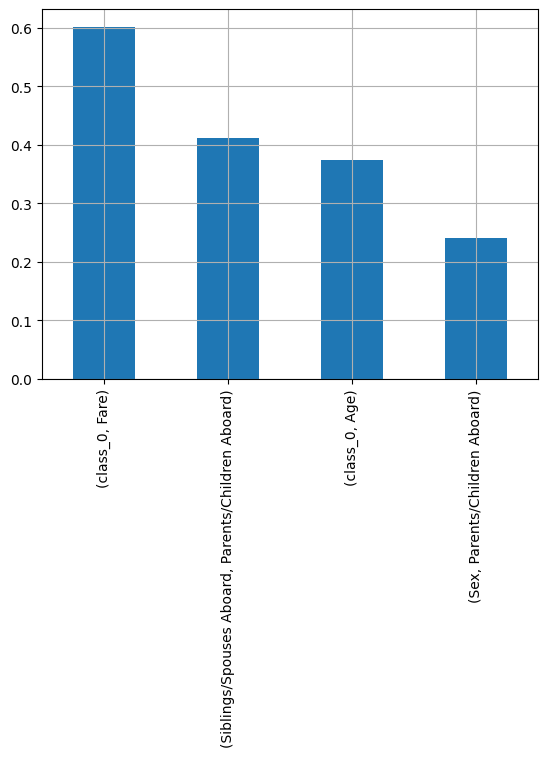

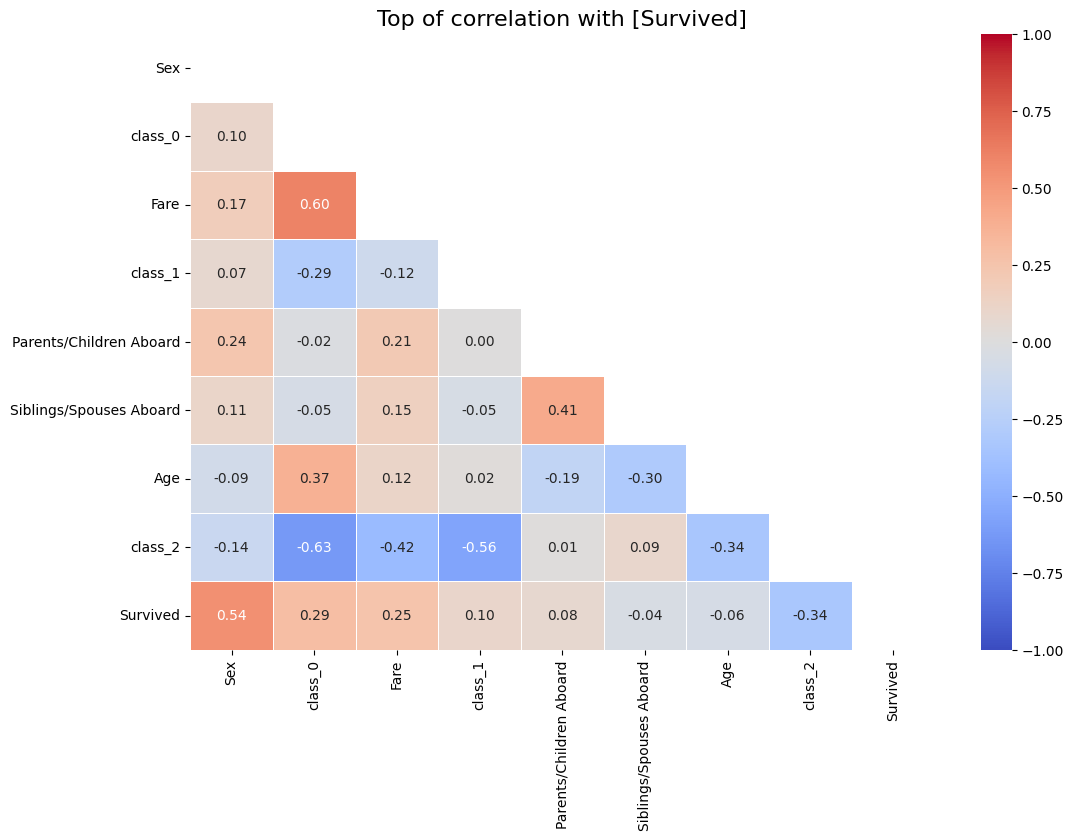

Sex                        0.539543
class_0                    0.293495
Fare                       0.251258
class_1                    0.101404
Parents/Children Aboard    0.075335
Siblings/Spouses Aboard   -0.042782
Age                       -0.057312
class_2                   -0.335093
Name: Survived, dtype: float64

In [13]:
#Drop name, for now
no_name_DF = df.drop(columns = ['Name'])
plot_overall_correlation_for(no_name_DF,'Survived',5)
plot_correlation_for(no_name_DF, 'Survived',10)

## Fare and PClass have high correlation. So... look it up?

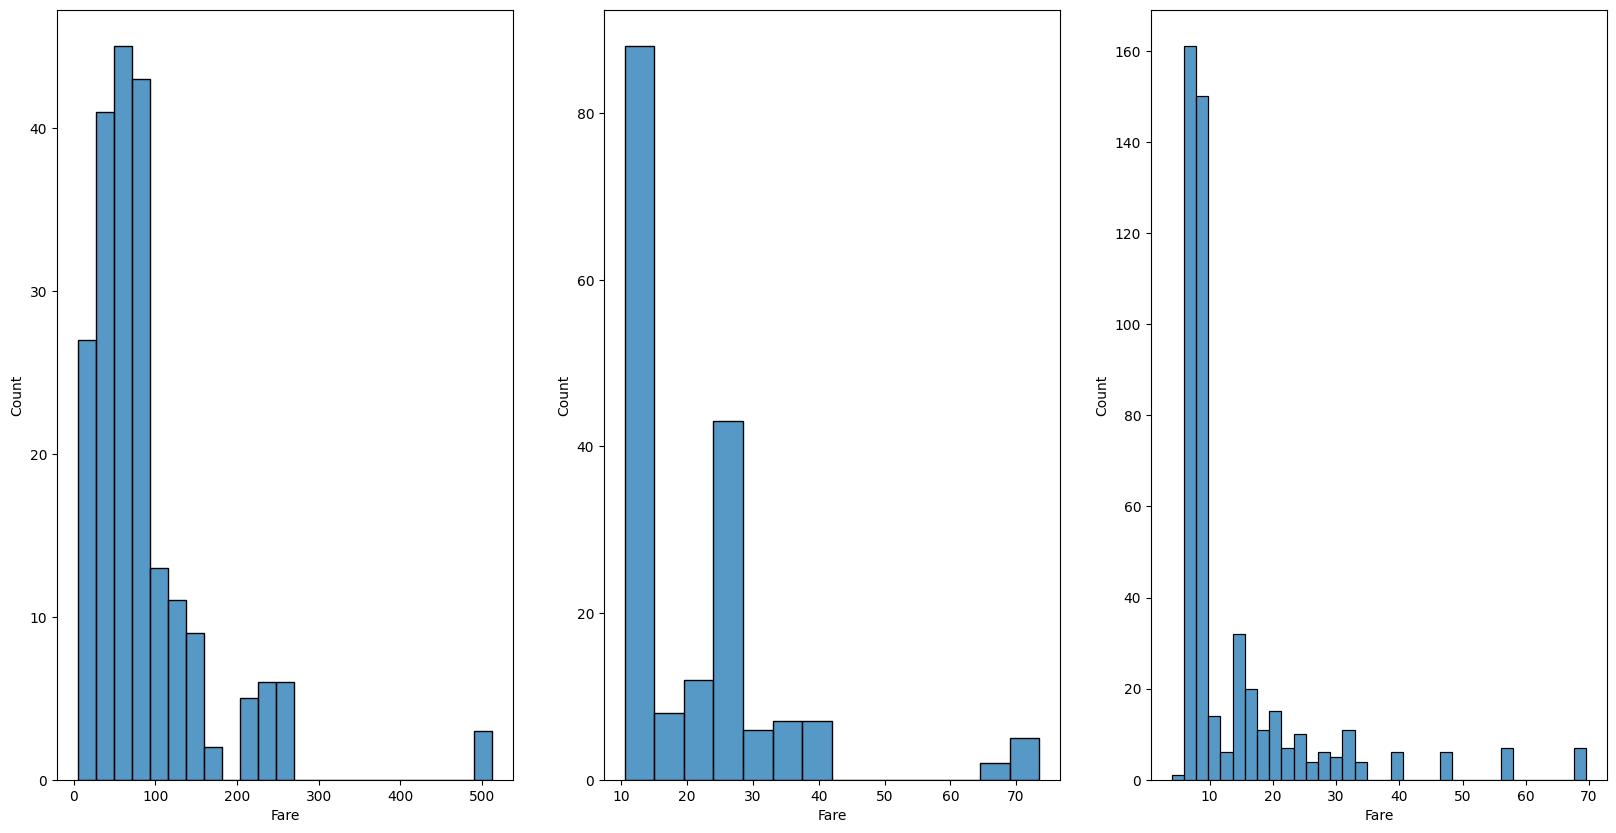

In [14]:
Pclasses = ['class_0','class_1','class_2']
fig, axs = plt.subplots(1, len(Pclasses), figsize=(20,10))
for i,Pclass in enumerate(Pclasses):
    sns.histplot(no_name_DF[no_name_DF[Pclass] == 1]['Fare'], ax = axs[i], label = f'Pclass =[{Pclass}]')
plt.show()


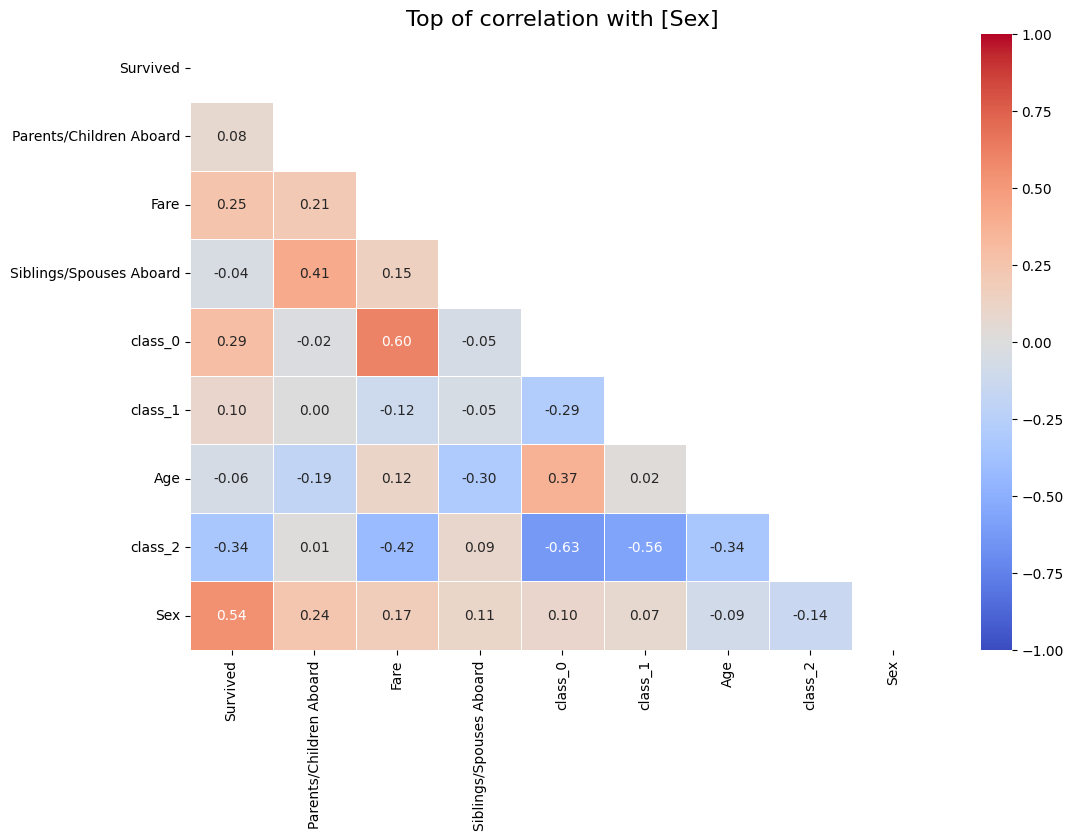

Survived                   0.539543
Parents/Children Aboard    0.239885
Fare                       0.174323
Siblings/Spouses Aboard    0.107908
class_0                    0.100522
class_1                    0.070555
Age                       -0.090220
class_2                   -0.143817
Name: Sex, dtype: float64

In [15]:
plot_correlation_for(no_name_DF, 'Sex',10)

In [16]:
#Correlation between sex and survival. In Percent
women = no_name_DF.loc[no_name_DF.Sex == 1]["Survived"]
rate_women = (sum(women)/len(women) ) * 100
#print(f"woman count : {no_name_DF.loc[no_name_DF.Sex == 1].value_counts():,.2f} %")
allSexes = no_name_DF['Sex'].value_counts();
print(f"Man on Titanic {allSexes[0]}")
print(f"Woman on Titanic {allSexes[1]}")
print(f"Woman/Man ratio on Titanic {allSexes[1]/allSexes[0]}")

print(f"Survival rate woman : {rate_women:,.2f} %")

man = no_name_DF.loc[no_name_DF.Sex == 0]["Survived"]
rate_men = (sum(man)/len(man))*100
print(f"Survival rate man : {rate_men:,.2f} %")


Man on Titanic 558
Woman on Titanic 314
Woman/Man ratio on Titanic 0.5627240143369175
Survival rate woman : 74.20 %
Survival rate man : 19.35 %


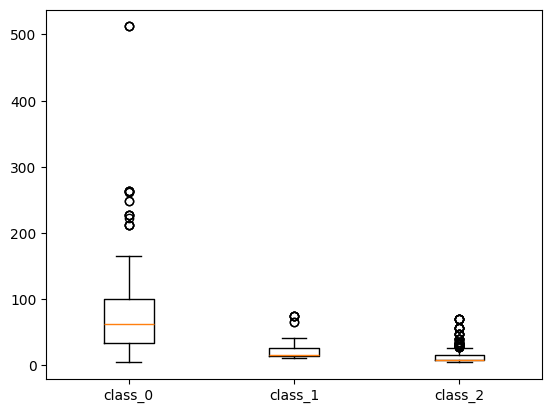

In [17]:
def print_fee_boxplot(_df):
    _0 = _df.loc[_df['class_0'] == 1, 'Fare'].values
    _1 = _df.loc[_df['class_1'] == 1, 'Fare'].values
    _2 = _df.loc[_df['class_2'] == 1, 'Fare'].values
    plt.boxplot([_0,_1,_2], labels = ["class_0","class_1","class_2"])
print_fee_boxplot(df)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score


In [19]:

def train_LogisticRegression(X,y):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
    log_reg = LogisticRegression(max_iter=1000) ## I have some error in here...
    log_reg.fit(X_train.values, y_train) # Provide only values without headers!
    print(f"log_reg score = {log_reg.score(X_test.values, y_test)}")
    return (X_train, X_test, y_train, y_test, log_reg) #Return values only

def do_prediction(_df,_targetColumnString):
    print("!-"*10)
    X = _df.drop(_targetColumnString, axis = 1)
    y = _df[_targetColumnString]
    X_train, X_test, y_train, y_test, log_reg = train_LogisticRegression(X,y)
    print(f"cross_val_score = {cross_val_score(log_reg, X, y, cv=5).mean()}")
    y_predicted = log_reg.predict(X_test.values)
    cm = confusion_matrix(y_test, y_predicted)
    disp = ConfusionMatrixDisplay.from_estimator(log_reg, X_test.values, y_test)
    disp.plot()
    log_regrression_curve = RocCurveDisplay.from_estimator(log_reg, X_test.values, y_test)
    print("!-"*10)
    return log_reg;


# Some random predictions

In [20]:
def create_passenger(sex,age,sib_sp_abo,par_chil_abo, fare, classType):
    return ([[sex,age,sib_sp_abo,par_chil_abo, fare, classType == 0, classType == 1, classType == 2]],
            f" sex=[{sex}],age=[{age}],sib_sp_abo=[{sib_sp_abo}],par_chil_abo=[{par_chil_abo}], fare=[{fare}], classType=[{classType}]")

passengers = [create_passenger(1,30,0,0,21,0),
 create_passenger(0,30,0,0,21,0),
 create_passenger(1,30,0,0,21,1),
 create_passenger(0,30,0,0,21,1),
 create_passenger(1,30,0,0,21,2),
 create_passenger(0,30,0,0,21,2),
create_passenger(1,30,0,0,76,0),
create_passenger(0,30,0,0,76,0)]


In [21]:
def predict_for_passengers(_passengers, predictor):
    print(10*'^-')
    for passenger_v, passenger_s in _passengers:
        predictor.predict(passenger_v)[0]
        probability = predictor.predict_proba(passenger_v)[0][1]
        print(f'Parameters: {passenger_s}')
        print(f'\tProbability of survival: {probability:.1%}')
    print(10*'@-')

# Try to remove those highest values of fee and see what will happend!

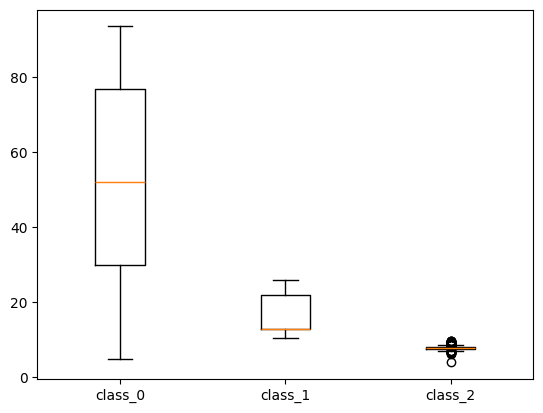

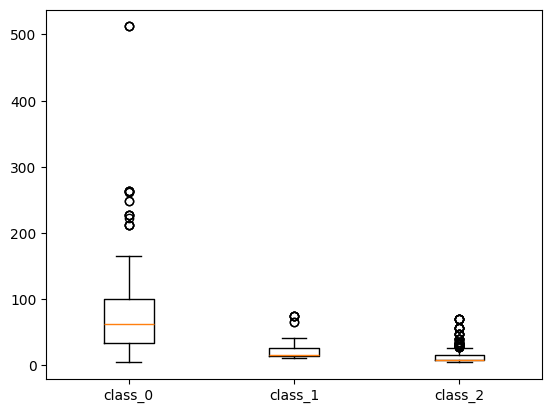

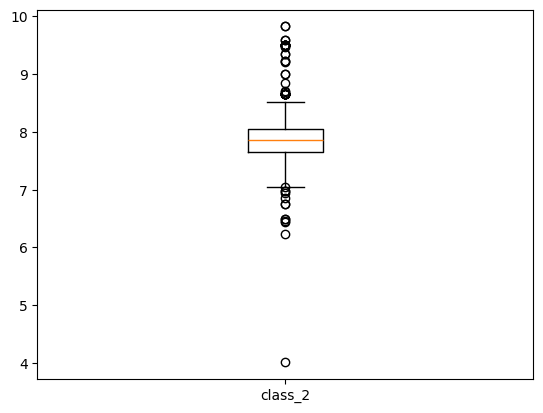

In [22]:
_0 = df.loc[df['class_0'] == 1, 'Fare'].quantile(0.75, interpolation='midpoint')
_1 = df.loc[df['class_1'] == 1, 'Fare'].quantile(0.75, interpolation='midpoint')
_2 = df.loc[df['class_2'] == 1, 'Fare'].quantile(0.65, interpolation='midpoint')

df_removed_fee = df.copy()
df_removed_fee.drop(columns=['Name'], inplace=True)

df_removed_fee.drop(df_removed_fee[(df_removed_fee['class_0'] == 1) & (df_removed_fee['Fare'] > _0)].index, inplace=True)
df_removed_fee.drop(df_removed_fee[(df_removed_fee['class_1'] == 1) & (df_removed_fee['Fare'] > _1)].index, inplace=True)
df_removed_fee.drop(df_removed_fee[(df_removed_fee['class_2'] == 1) & (df_removed_fee['Fare'] > _2)].index, inplace=True)

print_fee_boxplot(df_removed_fee)
plt.show()
print_fee_boxplot(df)
def print_fee_boxplot_2(_df):
    _2 = _df.loc[_df['class_2'] == 1, 'Fare'].values
    plt.boxplot([_2], labels = ["class_2"])
plt.show()
print_fee_boxplot_2(df_removed_fee)


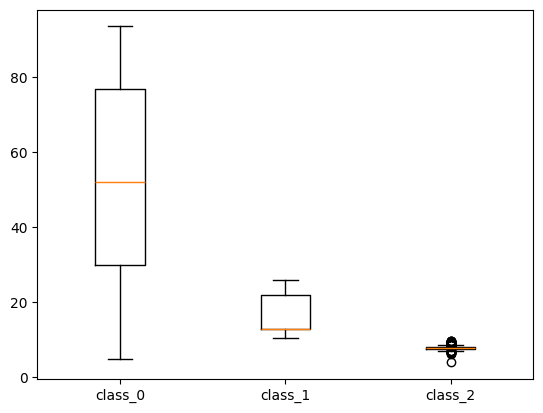

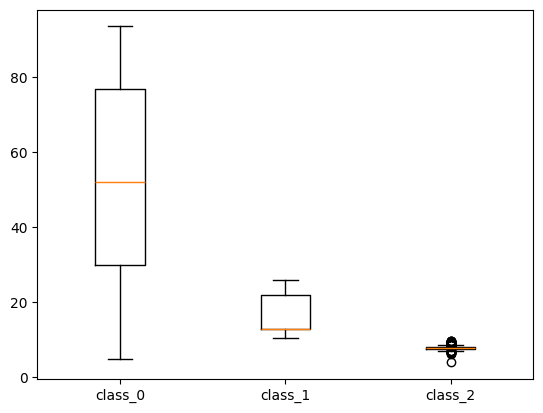

In [23]:
df_removed_0_fee = df_removed_fee.copy()

df_removed_0_fee.drop(df_removed_fee[(df_removed_fee['Fare'] == 0)].index, inplace=True)
print_fee_boxplot(df_removed_0_fee)
plt.show()
print_fee_boxplot(df_removed_0_fee)

!-!-!-!-!-!-!-!-!-!-
log_reg score = 0.8217821782178217
cross_val_score = 0.8167133146741303
!-!-!-!-!-!-!-!-!-!-
!-!-!-!-!-!-!-!-!-!-
log_reg score = 0.7951388888888888
cross_val_score = 0.7924334975369458
!-!-!-!-!-!-!-!-!-!-
!-!-!-!-!-!-!-!-!-!-
log_reg score = 0.8217821782178217
cross_val_score = 0.8167133146741303
!-!-!-!-!-!-!-!-!-!-
^-^-^-^-^-^-^-^-^-^-
Parameters:  sex=[1],age=[30],sib_sp_abo=[0],par_chil_abo=[0], fare=[21], classType=[0]
	Probability of survival: 90.9%
Parameters:  sex=[0],age=[30],sib_sp_abo=[0],par_chil_abo=[0], fare=[21], classType=[0]
	Probability of survival: 40.3%
Parameters:  sex=[1],age=[30],sib_sp_abo=[0],par_chil_abo=[0], fare=[21], classType=[1]
	Probability of survival: 83.1%
Parameters:  sex=[0],age=[30],sib_sp_abo=[0],par_chil_abo=[0], fare=[21], classType=[1]
	Probability of survival: 24.8%
Parameters:  sex=[1],age=[30],sib_sp_abo=[0],par_chil_abo=[0], fare=[21], classType=[2]
	Probability of survival: 63.4%
Parameters:  sex=[0],age=[30],sib_sp_

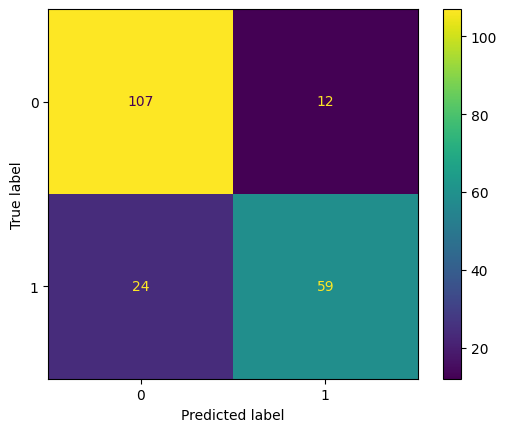

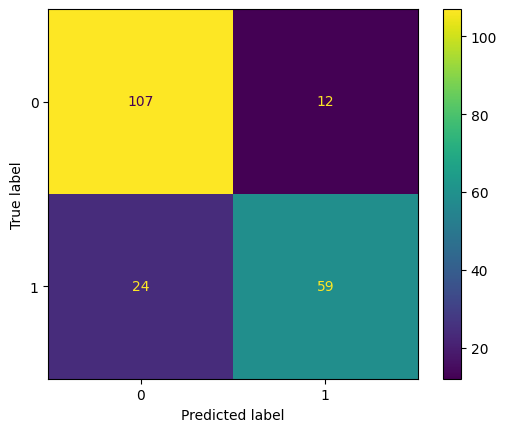

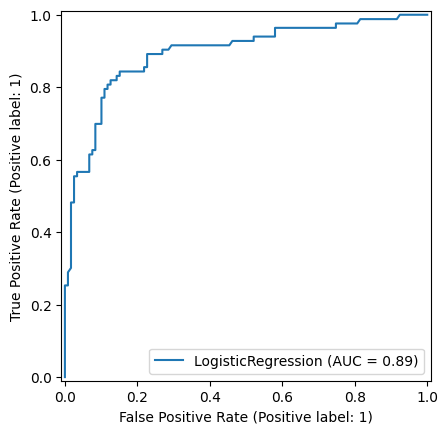

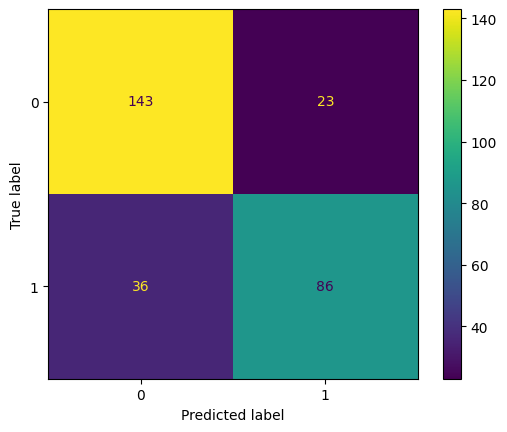

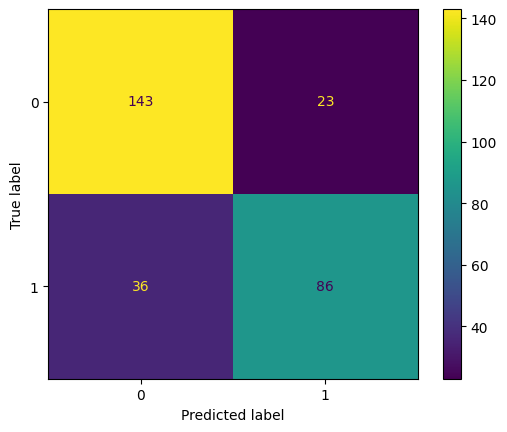

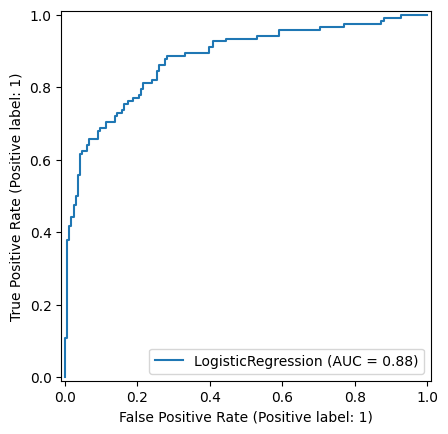

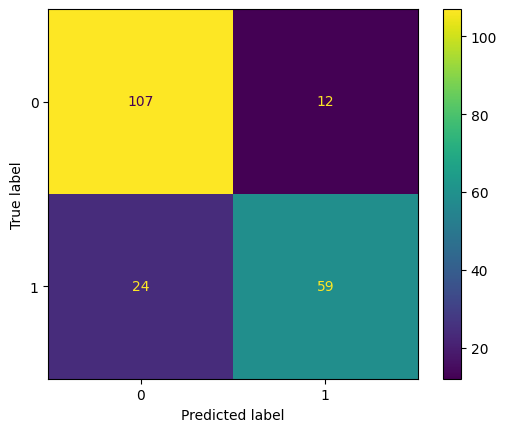

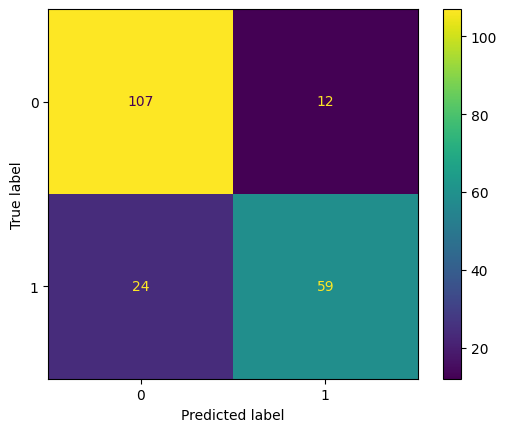

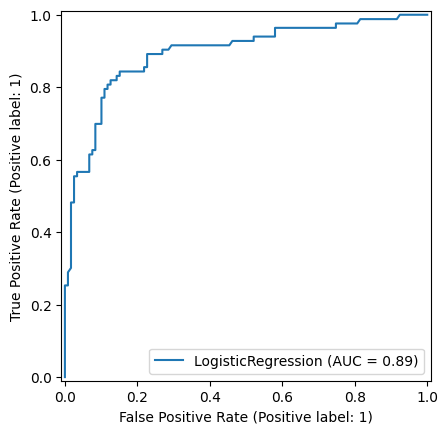

In [24]:
removed_fee_log_pred = do_prediction(df_removed_fee, 'Survived')
outliners_log_pred = do_prediction(no_name_DF, 'Survived')
removed_0_fee_log_pred = do_prediction(df_removed_0_fee, 'Survived')

predict_for_passengers(passengers,removed_fee_log_pred)
predict_for_passengers(passengers,outliners_log_pred)
predict_for_passengers(passengers,removed_0_fee_log_pred)